In [9]:
import tensorflow as tf
import numpy as np

In [10]:
# Parameters
learning_rate = 0.01
training_steps = 3000
display_step = 50
rng = np.random

In [11]:
# Training Data
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

shap_ = X.shape
print(shap_)

(17,)


In [4]:
# Weights and bias
weights = tf.Variable(rng.randn(), name="weight")
bias = tf.Variable(rng.randn(), name="bias")

# Linear regression
def linear_regression(x):
    return weights * X + bias

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

I0000 00:00:1761957894.754995   22186 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [15]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.171627, W: 0.305074, b: 0.419945
step: 100, loss: 0.167793, W: 0.298958, b: 0.463300
step: 150, loss: 0.164786, W: 0.293543, b: 0.501693
step: 200, loss: 0.162428, W: 0.288747, b: 0.535693
step: 250, loss: 0.160579, W: 0.284500, b: 0.565802
step: 300, loss: 0.159128, W: 0.280739, b: 0.592465
step: 350, loss: 0.157991, W: 0.277409, b: 0.616078
step: 400, loss: 0.157099, W: 0.274459, b: 0.636988
step: 450, loss: 0.156400, W: 0.271847, b: 0.655505
step: 500, loss: 0.155851, W: 0.269534, b: 0.671903
step: 550, loss: 0.155421, W: 0.267486, b: 0.686425
step: 600, loss: 0.155084, W: 0.265672, b: 0.699285
step: 650, loss: 0.154819, W: 0.264066, b: 0.710673
step: 700, loss: 0.154612, W: 0.262643, b: 0.720758
step: 750, loss: 0.154449, W: 0.261383, b: 0.729689
step: 800, loss: 0.154321, W: 0.260268, b: 0.737598
step: 850, loss: 0.154221, W: 0.259280, b: 0.744602
step: 900, loss: 0.154143, W: 0.258405, b: 0.750804
step: 950, loss: 0.154081, W: 0.257630, b: 0.756297
step: 1000, l

In [5]:
# Optimization Process
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    #Compute Gradients
    gradients = g.gradient(loss, [weights, bias])

    #Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

In [6]:
# Trainig
for step in range(1, training_steps + 1):
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss %f, W:%f, b:%f" % (step, loss, weights.numpy(), bias.numpy()))
        

step: 50, loss 0.157884, W:0.277073, b:0.618459
step: 100, loss 0.157015, W:0.274162, b:0.639097
step: 150, loss 0.156334, W:0.271584, b:0.657373
step: 200, loss 0.155800, W:0.269301, b:0.673557
step: 250, loss 0.155381, W:0.267279, b:0.687889
step: 300, loss 0.155052, W:0.265489, b:0.700582
step: 350, loss 0.154794, W:0.263904, b:0.711822
step: 400, loss 0.154592, W:0.262500, b:0.721775
step: 450, loss 0.154434, W:0.261256, b:0.730590
step: 500, loss 0.154309, W:0.260155, b:0.738395
step: 550, loss 0.154212, W:0.259180, b:0.745308
step: 600, loss 0.154135, W:0.258317, b:0.751430
step: 650, loss 0.154076, W:0.257552, b:0.756850
step: 700, loss 0.154029, W:0.256875, b:0.761651
step: 750, loss 0.153992, W:0.256275, b:0.765902
step: 800, loss 0.153963, W:0.255744, b:0.769667
step: 850, loss 0.153940, W:0.255274, b:0.773001
step: 900, loss 0.153922, W:0.254858, b:0.775954
step: 950, loss 0.153908, W:0.254489, b:0.778568
step: 1000, loss 0.153897, W:0.254162, b:0.780884
step: 1050, loss 0.1

In [7]:
import matplotlib.pyplot as plt

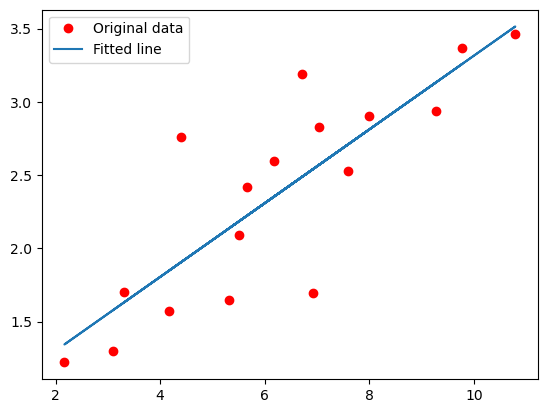

In [8]:
plt.plot(X, Y, "ro", label="Original data")
plt.plot(X, np.array(weights * X + bias), label="Fitted line")
plt.legend()
plt.show()